In [22]:
# Import Library
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Baca Dataset
data = pd.read_csv('2019.csv')
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [24]:
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


### 1. Untuk feature/column Generosity & Perceptions of corruption, hitung dan beri penjelasan (insight) terkait:
- Titik Pusat Data (Central Tendency)
- Persebaran Data (Dispersion)
- Distribusi Data (Distribution)

#### Distribusi Data

##### Generosity

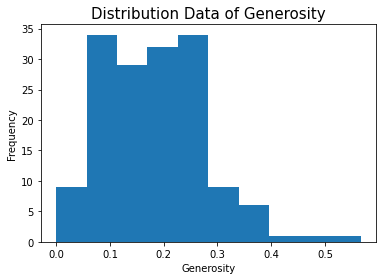

In [26]:
plt.hist(data['Generosity'])
plt.title('Distribution Data of Generosity', size=15)
plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.show()

##### Perceptions of corruption

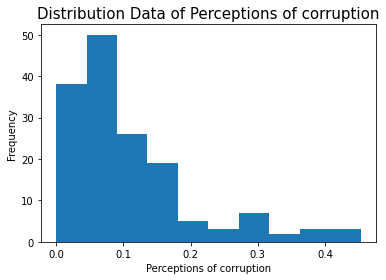

In [27]:
plt.hist(data['Perceptions of corruption'])
plt.title('Distribution Data of Perceptions of corruption', size=15)
plt.xlabel('Perceptions of corruption')
plt.ylabel('Frequency')
plt.show()

#### Dikarenakan distribusi data pada kolom 'Generosity' & 'Perceptions of corruption' termasuk kategori right skewed distribution, maka penentuan titik pusat data lebih baik menggunakan median

#### Titik Pusat Data

In [28]:
print(data['Generosity'].median())
print(data['Perceptions of corruption'].median())

0.1775
0.08549999999999999


#### Persebaran Data

##### Generosity

In [29]:
# Sedang persebaran data pada kolom 'Generosity' & 'Perceptions of corruption' adalah sebagai berikut:
print('Generosity Standar Deviation:', data['Generosity'].std())
print('Generosity Variance:', data['Generosity'].var())
print('Generosity Mean Absolute Deviation:', data['Generosity'].mad())

Generosity Standar Deviation: 0.09525444050922022
Generosity Variance: 0.009073408436724573
Generosity Mean Absolute Deviation: 0.07554536489151872


##### Perceptions of corruption

In [30]:
print('Perceptions of corruption Standar Deviation:', data['Perceptions of corruption'].std())
print('Perceptions of corruption Variance:', data['Perceptions of corruption'].var())
print('Perceptions of corruption Mean Absolute Deviation:', data['Perceptions of corruption'].mad())

Perceptions of corruption Standar Deviation: 0.09453783536745278
Perceptions of corruption Variance: 0.008937402315963605
Perceptions of corruption Mean Absolute Deviation: 0.0690034516765286


### 2. Carilah data outlier dan beri penjelasan (insight) pada feature/column Social support ! Tambahkan plot untuk menampilkan adanya data outlier!

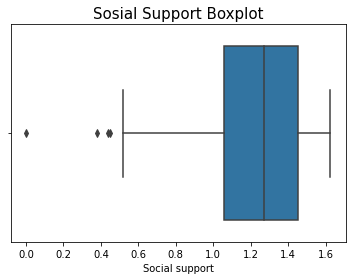

In [31]:
sns.boxplot(data['Social support'])
plt.title('Sosial Support Boxplot',size=15)
plt.show()

In [32]:
q1 = np.quantile(data['Social support'],0.25)
q3 = np.quantile(data['Social support'],0.75)
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr
print (lower)
print (upper)

0.46062500000000006
2.047625


In [36]:
data[['Country or region','Social support']].loc[(data['Social support'] <= lower)| (data['Social support'] >= upper)]

,Country or region,Social support
101,Benin,0.437
144,Burundi,0.447
148,Syria,0.378
154,Central African Republic,0.000


##### Data negara yang merupakan outlier ada 4 negara, dimana keempat negara tersebut merupakan outlier karena berada dibawah batas bawahnya (lower)

### 3. Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column Freedom to make life choices. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

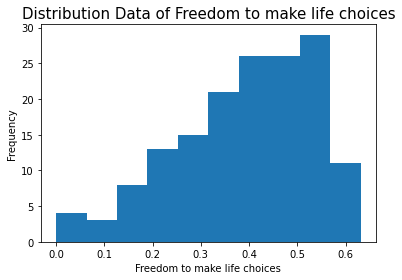

In [37]:
plt.hist(data['Freedom to make life choices'])
plt.title('Distribution Data of Freedom to make life choices', size=15)
plt.xlabel('Freedom to make life choices')
plt.ylabel('Frequency')
plt.show()

#### Grafik menunjukkan frekuensi freedom to make life choices termasuk kategori left skewed

### 4. Di antara GDP per capita, Social support, & Healthy life expectancy, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Score? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk pemerintah dalam merumuskan kebijakan?

In [51]:
from scipy.stats import pearsonr
list1 = data['GDP per capita']
list2 = data['Social support']
list3 = data['Healthy life expectancy']
list4 = data['Score']

corr1,_= pearsonr(list1, list4)
corr2,_= pearsonr(list2, list4)
corr3,_= pearsonr(list3, list4)
print('Pearson correlation GDP vs Score: %.3f' % corr1)
print('Pearson correlation Social support vs Score: %.3f' % corr2)
print('Pearson correlation Healthy life expectancy vsScore: %.3f' % corr3)

Pearson correlation GDP vs Score: 0.794
Pearson correlation Social support vs Score: 0.777
Pearson correlation Healthy life expectancy vsScore: 0.780


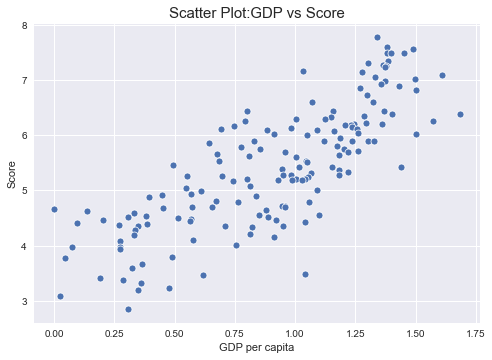

In [52]:
sns.scatterplot(data=data,x='GDP per capita', y='Score')
plt.title('Scatter Plot:GDP vs Score', size=15 )
plt.show()

#### Beradasarkan hasil nilai korelasi dan grafik scatter plot, GDP dengan Score, memiliki nilai korelasi yang lebih tinggi yang menunjukkan semakin negara meningkatkan GDP, semakin tinggi Score nya

### 5. Hitung berapa negara yang Score kebahagiaan warganya di atas rata-rata! Dari negara-negara yang Score-nya di atas rata-rata tersebut:
- Tampilkan 5 negara yang GDP per capita-nya tertinggi dalam bentuk Barplot!
- Tampilkan 5 negara yang Perceptions of corruption terendah dalam bentuk Barplot!
- Tampilkan 5 negara yang Generosity terendah dalam bentuk Barplot!